## Question4: Online Q-learning
Implement an online Q learning algorithm with a small neural net for function approximation.

# Running this file
Run the first two cells and proceed as instucted

In [1]:
import sys
import math
import random
import pdb
import numpy as np
import tensorflow as tf
import gym
import time
import warnings
import matplotlib.pyplot as plt
import matplotlib
import os
warnings.filterwarnings('ignore')

In [2]:
def get_q_optimize2(state,next_state, action , alpha, reward, discount):
    
    weights = {'hidden': tf.Variable(tf.random_uniform([100, 4], 0, 0.01)),
               'output': tf.Variable(tf.random_uniform([2, 100], 0, 0.01))}
    biases = {'hidden': tf.Variable(tf.random_uniform([100,1], 0, 0.01)),
              'output': tf.Variable(tf.random_uniform([2,1], 0, 0.01))} 
    
    hidden = tf.nn.relu(tf.matmul(weights['hidden'], state) + biases['hidden'])
    q = tf.matmul(weights['output'], hidden) + biases['output']

    hidden = tf.nn.relu(tf.matmul(weights['hidden'], next_state) + biases['hidden'])
    q_prime = tf.matmul(weights['output'], hidden) + biases['output']

    delta = reward + 1   # don't boostrap if state is terminal (0 if terminal, 1 otherwise)
    # get the target value
    target = reward + delta * discount * tf.stop_gradient(tf.reduce_max(q_prime))
    # bellman loss
    loss = tf.square(target - q[action,0])/2

    opt =tf.train.AdamOptimizer(learning_rate=alpha).minimize(loss)
    return  q,opt

In [3]:
# Training parameters
max_eps_length = 300
discount = 0.99
alpha = 0.001
freq = 2
n_episodes = 2000
epsilon = 0.05
sample_episodes = 10
episode_lengths = []
episode_returns = []

In [4]:
def eps_greed(q,counting,epsilon=0.05):
    u = np.random.uniform(0,1,1)
    if u <= epsilon:
        counting+=1

        if np.random.uniform(0,1,1)>0.5:
            act = 0
        else:
            act = 1
    else:
        act = np.argmax(q)
        
    return act, counting

In [5]:
def get_variables():
    
    weights = {'w1': tf.Variable(tf.random_uniform([4, 100], 0, 0.1)),
               'w2': tf.Variable(tf.random_uniform([100, 2], 0, 0.1))}
    biases = {'b1': tf.Variable(tf.random_uniform([100], 0, 0.1)),
              'b2': tf.Variable(tf.random_uniform([2], 0, 0.1))}
    return weights,biases

# Do not run these cells...
Continue to load data below to load model and get return and length of episodes

In [6]:
# Need to save the model, weights and biases varibles

# Suggested Directory to use
save_MDir = 'new_models/A4/'


#create the directory if it does not exist already
if not os.path.exists(save_MDir):
    os.makedirs(save_MDir)

#save_model = os.path.join(save_MDir,'replay_model')

In [25]:
print(save_MDir)

new_models/A4/


Firstly, just do it for 2000 episodes with every 100 episode, take 10 samples and average, to try and parameterize the learning rate.

In [33]:
start = time.time()
episode_lengths = []
episode_returns = []
#print('------------Begining to run experiment with learning rate: {} ------------'.format(alpha))
env = gym.make('CartPole-v0')
env._max_episode_steps = 210
state = tf.placeholder("float", [4, 1])
action = tf.placeholder("int32", ())
next_state = tf.placeholder("float", [4, 1])
reward = tf.placeholder("float", ())

q,optimize = get_q_optimize2(state, next_state,action, alpha, reward, discount)
terminate_episode = False
init = tf.global_variables_initializer()
count = 0
counting = 0
saver = tf.train.Saver()
n_episodes = 300
with tf.Session() as sess:
    sess.run(init)
    
    for i_episode in range(n_episodes):
        if i_episode % 100 and i_episode >0 == 0:
            print('Now runnning episode:{}'.format(i_episode))
            print('last episode length {}\n'.format(episode_lengths[-1]))
            #if i_episode>0:
                
#                 if episode_lengths[-1]>180:
#                         print('Saving model...')
                        
#                         file_name = "A4_large%i.ckpt" %(int(alpha*100000))
#                         save_model = os.path.join(save_MDir,file_name)
#                         saver.save(sess= sess, save_path = save_model)
            
        s = env.reset()
        for t in range(max_eps_length):
            cur_q = sess.run(q, feed_dict={state:s.reshape(-1,1)})

            a, counting = eps_greed(cur_q,counting)
            s_prime,re,done,info = env.step(a)

            if done:
                
                re = -1
                episode_lengths.append(t+1)
                episode_returns.append(-1*discount**t)
                terminate_episode = True
                if t+1>=200:
                    print('Saving model...')

                    file_name = "A4_large%i.ckpt" %(int(alpha*100000))
                    save_model = os.path.join(save_MDir,file_name)
                    saver.save(sess= sess, save_path = save_model)                
            else:
                re = 0
            this_dict = {state:s.reshape(-1,1), next_state:s_prime.reshape(-1,1), action:a, reward:re}
            opt = sess.run([optimize],this_dict)

            if  terminate_episode == True:
                count +=1
                terminate_episode = False
                break
            s = s_prime
print(time.time()-start)

[2017-04-08 17:18:53,978] Making new env: CartPole-v0


Now runnning episode:1
last episode length 12

Now runnning episode:2
last episode length 10

Now runnning episode:3
last episode length 9

Now runnning episode:4
last episode length 22

Now runnning episode:5
last episode length 9

Now runnning episode:6
last episode length 14

Now runnning episode:7
last episode length 10

Now runnning episode:8
last episode length 12

Now runnning episode:9
last episode length 11

Now runnning episode:10
last episode length 8

Now runnning episode:11
last episode length 10

Now runnning episode:12
last episode length 13

Now runnning episode:13
last episode length 10

Now runnning episode:14
last episode length 12

Now runnning episode:15
last episode length 15

Now runnning episode:16
last episode length 10

Now runnning episode:17
last episode length 9

Now runnning episode:18
last episode length 53

Now runnning episode:19
last episode length 30

Now runnning episode:20
last episode length 51

Now runnning episode:21
last episode length 19

Now r

In [169]:
np.asarray(episode_lengths[:])>200

array([False, False, False, ...,  True,  True,  True], dtype=bool)

In [172]:
sum(i >= 200 for i in episode_lengths)

859

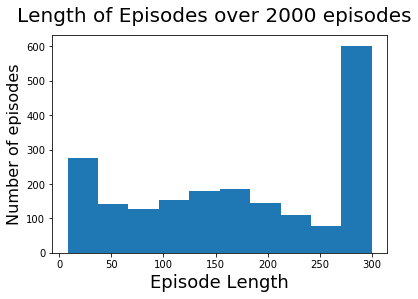

In [167]:
fig = plt.figure()
plt.hist(episode_lengths[:])
fig.suptitle('Length of Episodes over 2000 episodes', fontsize=20)
plt.xlabel('Episode Length', fontsize=18)
plt.ylabel('Number of episodes', fontsize=16)
plt.show()
fig.savefig('./results/pics/A4_ADAM_0_001_300.jpg')

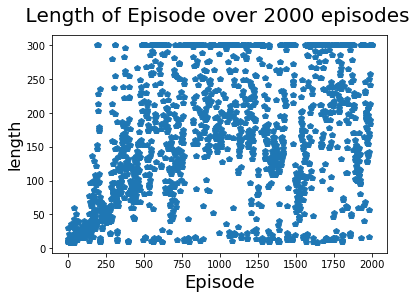

In [174]:
t = np.linspace(0,2000-1,2000)
fig = plt.figure()

plt.plot(t,episode_lengths[:],'p')# plotting t,a separately 

fig.suptitle(' Length of Episode over 2000 episodes', fontsize=20)
legend = plt.legend(loc='lower right', shadow=True)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('length', fontsize=16)
plt.show()
fig.savefig('./results/pics/A4_ADAM_0_001_300scatter.jpg')

In [7]:
# Need to save the model, weights and biases varibles

# Suggested Directory to use
save_MDir = 'models/A4/'


#create the directory if it does not exist already
if not os.path.exists(save_MDir):
    os.makedirs(save_MDir)

save_model = os.path.join(save_MDir,'best_model')

Ready to go with 2000 episodes, testing every 20th episode for 15 episodes. This is done 100 times to get a good average.

In [16]:
start = time.time()
sample_episodes = 15
Averaged_episode_lengths = []
Averaged_episode_returns = []
n_episodes = 2000
freq = n_episodes/100
count = 0
total_iterations = 100
counting = 0    

for iteration in  range(total_iterations):
    # for each episode in 2000 episodes we optimize the q values. 
    print('----Starting iteration number: {}----'.format(iteration+1))
    start_iteration = time.time()
    episode_lengths = []
    episode_returns = []
    total_episode_lengths = []
    total_episode_returns = []
    env = gym.make('CartPole-v0')
    env._max_episode_steps = 300

    state = tf.placeholder("float", [4, 1])
    action = tf.placeholder("int32", ())
    next_state = tf.placeholder("float", [4, 1])
    reward = tf.placeholder("float", ())

    q,optimize = get_q_optimize2(state, next_state,action, alpha, reward, discount)
    terminate_episode = False
    init = tf.global_variables_initializer()
    saver = tf.train.Saver(write_version=tf.train.SaverDef.V2)
    
    
    with tf.Session() as sess:
        sess.run(init)

        for i_episode in range(n_episodes):
            
            # Every 20 episodes we take 10 sample runs and report their average lengths
            if i_episode % freq == 0:
                print('Now runnning episode:{}'.format(i_episode))
                sample_episode_lengths = []
                sample_episode_returns = []            
                for _ in range(sample_episodes):
                    s = env.reset()
                    for t in range(max_eps_length):
                        cur_q = sess.run(q, feed_dict={state:s.reshape(-1,1)})
                        a, counting = eps_greed(cur_q,counting)
                        s_prime,re,done,info = env.step(a)


                        if done:
                            #print('episode finished')
                            re = -1
                            sample_episode_lengths.append(t+1)
                            sample_episode_returns.append(-1*discount**t)
                            break

                        s = s_prime
                total_episode_lengths.append(np.mean(sample_episode_lengths))
                total_episode_returns.append(np.mean(sample_episode_returns))

            # Onine learning, dont take batches
            s = env.reset()
            for t in range(max_eps_length):
                cur_q = sess.run(q, feed_dict={state:s.reshape(-1,1)})
                a, counting = eps_greed(cur_q,counting)
                s_prime,re,done,info = env.step(a)
                
                if done:
                    re = -1
                    episode_lengths.append(t+1)
                    episode_returns.append(-1*discount**t)
                    terminate_episode = True
                else:
                    re = 0
                    
                this_dict = {state:s.reshape(-1,1), next_state:s_prime.reshape(-1,1), action:a, reward:re}
                opt = sess.run([optimize],this_dict)

                if  terminate_episode == True:
                    count +=1
                    terminate_episode = False
                    break
                s = s_prime
        if iteration %5 == 0:
            print('Saving model...')
            saver.save(sess= sess, save_path = save_model)
    
    Averaged_episode_lengths.append(total_episode_lengths)
    Averaged_episode_returns.append(total_episode_returns)          
    print('----Iteration {} complete in {} seconds. Total runtime = {} ---- \n'.format(iteration+1,time.time()-start_iteration,time.time()-start))

Final_lengths = np.asarray(Averaged_episode_lengths)
Final_returns = np.asarray(Averaged_episode_returns)
Final_lengths = np.mean(Final_lengths,0).reshape(-1,1)
Final_returns = np.mean(Final_returns,0).reshape(-1,1)
saved_data  = np.concatenate((Final_lengths, Final_returns), axis=1)
filename = './results/A4_results.csv'
np.savetxt(filename, saved_data, delimiter=' ,')
print('Total run time is: {}'.format(time.time()-start))

[2017-04-02 21:49:38,312] Making new env: CartPole-v0


----Starting iteration number: 1----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:680
Now runnning episode:700
Now runnning episode:720
Now runnning episode:740
Now runnning episod

[2017-04-02 21:54:33,208] Making new env: CartPole-v0


----Iteration 1 complete in 294.89877486228943 seconds. Total runtime = 294.89877486228943 ---- 

----Starting iteration number: 2----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-02 22:00:15,547] Making new env: CartPole-v0


----Iteration 2 complete in 342.33945536613464 seconds. Total runtime = 637.2382302284241 ---- 

----Starting iteration number: 3----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:6

[2017-04-02 22:04:59,137] Making new env: CartPole-v0


----Iteration 3 complete in 283.5908682346344 seconds. Total runtime = 920.8290984630585 ---- 

----Starting iteration number: 4----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:68

[2017-04-02 22:10:08,961] Making new env: CartPole-v0


----Iteration 4 complete in 309.8235640525818 seconds. Total runtime = 1230.6526625156403 ---- 

----Starting iteration number: 5----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:6

[2017-04-02 22:15:42,312] Making new env: CartPole-v0


----Iteration 5 complete in 333.3508257865906 seconds. Total runtime = 1564.0034883022308 ---- 

----Starting iteration number: 6----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:6

[2017-04-02 22:20:52,344] Making new env: CartPole-v0


----Iteration 6 complete in 310.0325746536255 seconds. Total runtime = 1874.0360629558563 ---- 

----Starting iteration number: 7----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:6

[2017-04-02 22:25:09,469] Making new env: CartPole-v0


----Iteration 7 complete in 257.1246120929718 seconds. Total runtime = 2131.160675048828 ---- 

----Starting iteration number: 8----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:68

[2017-04-02 22:30:04,982] Making new env: CartPole-v0


----Iteration 8 complete in 295.513386964798 seconds. Total runtime = 2426.674062013626 ---- 

----Starting iteration number: 9----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:680

[2017-04-02 22:35:09,124] Making new env: CartPole-v0


----Iteration 9 complete in 304.14167499542236 seconds. Total runtime = 2730.8157370090485 ---- 

----Starting iteration number: 10----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-02 22:39:55,544] Making new env: CartPole-v0


----Iteration 10 complete in 286.4204068183899 seconds. Total runtime = 3017.2361438274384 ---- 

----Starting iteration number: 11----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-02 22:45:33,957] Making new env: CartPole-v0


----Iteration 11 complete in 338.4116849899292 seconds. Total runtime = 3355.6478288173676 ---- 

----Starting iteration number: 12----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-02 22:50:28,671] Making new env: CartPole-v0


----Iteration 12 complete in 294.7140123844147 seconds. Total runtime = 3650.361841201782 ---- 

----Starting iteration number: 13----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-02 22:55:33,946] Making new env: CartPole-v0


----Iteration 13 complete in 305.2760500907898 seconds. Total runtime = 3955.637891292572 ---- 

----Starting iteration number: 14----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-02 23:00:03,024] Making new env: CartPole-v0


----Iteration 14 complete in 269.0776617527008 seconds. Total runtime = 4224.715553045273 ---- 

----Starting iteration number: 15----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-02 23:04:50,703] Making new env: CartPole-v0


----Iteration 15 complete in 287.6785156726837 seconds. Total runtime = 4512.3940687179565 ---- 

----Starting iteration number: 16----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-02 23:10:45,745] Making new env: CartPole-v0


----Iteration 16 complete in 355.04249453544617 seconds. Total runtime = 4867.437064647675 ---- 

----Starting iteration number: 17----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-02 23:16:39,301] Making new env: CartPole-v0


----Iteration 17 complete in 353.555721282959 seconds. Total runtime = 5220.9927859306335 ---- 

----Starting iteration number: 18----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-02 23:21:50,248] Making new env: CartPole-v0


----Iteration 18 complete in 310.9472002983093 seconds. Total runtime = 5531.939986228943 ---- 

----Starting iteration number: 19----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-02 23:27:30,995] Making new env: CartPole-v0


----Iteration 19 complete in 340.7466821670532 seconds. Total runtime = 5872.686668395996 ---- 

----Starting iteration number: 20----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-02 23:33:05,113] Making new env: CartPole-v0


----Iteration 20 complete in 334.11767864227295 seconds. Total runtime = 6206.804347038269 ---- 

----Starting iteration number: 21----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-02 23:38:46,958] Making new env: CartPole-v0


----Iteration 21 complete in 341.84562492370605 seconds. Total runtime = 6548.649971961975 ---- 

----Starting iteration number: 22----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-02 23:43:46,334] Making new env: CartPole-v0


----Iteration 22 complete in 299.37624764442444 seconds. Total runtime = 6848.0262196063995 ---- 

----Starting iteration number: 23----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-02 23:48:14,641] Making new env: CartPole-v0


----Iteration 23 complete in 268.30678057670593 seconds. Total runtime = 7116.3330001831055 ---- 

----Starting iteration number: 24----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-02 23:53:46,961] Making new env: CartPole-v0


----Iteration 24 complete in 332.3188228607178 seconds. Total runtime = 7448.651823043823 ---- 

----Starting iteration number: 25----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-02 23:58:59,629] Making new env: CartPole-v0


----Iteration 25 complete in 312.66873693466187 seconds. Total runtime = 7761.320559978485 ---- 

----Starting iteration number: 26----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 00:05:08,376] Making new env: CartPole-v0


----Iteration 26 complete in 368.74645709991455 seconds. Total runtime = 8130.0670170784 ---- 

----Starting iteration number: 27----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:6

[2017-04-03 00:10:51,676] Making new env: CartPole-v0


----Iteration 27 complete in 343.2995672225952 seconds. Total runtime = 8473.366584300995 ---- 

----Starting iteration number: 28----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 00:16:00,008] Making new env: CartPole-v0


----Iteration 28 complete in 308.33232855796814 seconds. Total runtime = 8781.698912858963 ---- 

----Starting iteration number: 29----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 00:20:35,232] Making new env: CartPole-v0


----Iteration 29 complete in 275.2235782146454 seconds. Total runtime = 9056.923493385315 ---- 

----Starting iteration number: 30----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 00:26:10,405] Making new env: CartPole-v0


----Iteration 30 complete in 335.17360758781433 seconds. Total runtime = 9392.09710097313 ---- 

----Starting iteration number: 31----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 00:32:13,096] Making new env: CartPole-v0


----Iteration 31 complete in 362.69019174575806 seconds. Total runtime = 9754.787292718887 ---- 

----Starting iteration number: 32----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 00:37:19,870] Making new env: CartPole-v0


----Iteration 32 complete in 306.77299785614014 seconds. Total runtime = 10061.560792446136 ---- 

----Starting iteration number: 33----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-03 00:42:52,881] Making new env: CartPole-v0


----Iteration 33 complete in 333.01047682762146 seconds. Total runtime = 10394.572283029556 ---- 

----Starting iteration number: 34----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-03 00:48:31,822] Making new env: CartPole-v0


----Iteration 34 complete in 338.9407320022583 seconds. Total runtime = 10733.513015031815 ---- 

----Starting iteration number: 35----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 00:53:30,209] Making new env: CartPole-v0


----Iteration 35 complete in 298.38807940483093 seconds. Total runtime = 11031.901094436646 ---- 

----Starting iteration number: 36----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-03 01:00:04,075] Making new env: CartPole-v0


----Iteration 36 complete in 393.8650462627411 seconds. Total runtime = 11425.766140699387 ---- 

----Starting iteration number: 37----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 01:06:08,574] Making new env: CartPole-v0


----Iteration 37 complete in 364.49820470809937 seconds. Total runtime = 11790.26534819603 ---- 

----Starting iteration number: 38----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 01:11:55,302] Making new env: CartPole-v0


----Iteration 38 complete in 346.7286159992218 seconds. Total runtime = 12136.993964195251 ---- 

----Starting iteration number: 39----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 01:17:51,686] Making new env: CartPole-v0


----Iteration 39 complete in 356.3836193084717 seconds. Total runtime = 12493.377583503723 ---- 

----Starting iteration number: 40----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 01:23:43,635] Making new env: CartPole-v0


----Iteration 40 complete in 351.9488546848297 seconds. Total runtime = 12845.326438188553 ---- 

----Starting iteration number: 41----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 01:30:12,879] Making new env: CartPole-v0


----Iteration 41 complete in 389.2434799671173 seconds. Total runtime = 13234.56991815567 ---- 

----Starting iteration number: 42----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 01:36:21,409] Making new env: CartPole-v0


----Iteration 42 complete in 368.53125381469727 seconds. Total runtime = 13603.101171970367 ---- 

----Starting iteration number: 43----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-03 01:42:39,834] Making new env: CartPole-v0


----Iteration 43 complete in 378.4248390197754 seconds. Total runtime = 13981.526010990143 ---- 

----Starting iteration number: 44----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 01:48:23,760] Making new env: CartPole-v0


----Iteration 44 complete in 343.9251890182495 seconds. Total runtime = 14325.451200008392 ---- 

----Starting iteration number: 45----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 01:54:31,902] Making new env: CartPole-v0


----Iteration 45 complete in 368.1414682865143 seconds. Total runtime = 14693.593670606613 ---- 

----Starting iteration number: 46----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 03:01:39,226] Making new env: CartPole-v0


----Iteration 46 complete in 4027.323261499405 seconds. Total runtime = 18720.916932106018 ---- 

----Starting iteration number: 47----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 03:07:03,559] Making new env: CartPole-v0


----Iteration 47 complete in 324.33252787590027 seconds. Total runtime = 19045.250467538834 ---- 

----Starting iteration number: 48----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-03 03:12:43,361] Making new env: CartPole-v0


----Iteration 48 complete in 339.8027284145355 seconds. Total runtime = 19385.05319595337 ---- 

----Starting iteration number: 49----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 03:18:18,480] Making new env: CartPole-v0


----Iteration 49 complete in 335.1180753707886 seconds. Total runtime = 19720.171271324158 ---- 

----Starting iteration number: 50----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 03:24:21,227] Making new env: CartPole-v0


----Iteration 50 complete in 362.7477502822876 seconds. Total runtime = 20082.919021606445 ---- 

----Starting iteration number: 51----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 03:32:04,603] Making new env: CartPole-v0


----Iteration 51 complete in 463.37593150138855 seconds. Total runtime = 20546.294953107834 ---- 

----Starting iteration number: 52----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-03 03:38:16,307] Making new env: CartPole-v0


----Iteration 52 complete in 371.70357728004456 seconds. Total runtime = 20917.99853038788 ---- 

----Starting iteration number: 53----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 03:44:24,894] Making new env: CartPole-v0


----Iteration 53 complete in 368.58717226982117 seconds. Total runtime = 21286.5857026577 ---- 

----Starting iteration number: 54----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 03:50:25,363] Making new env: CartPole-v0


----Iteration 54 complete in 360.4682333469391 seconds. Total runtime = 21647.05393600464 ---- 

----Starting iteration number: 55----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 03:56:08,933] Making new env: CartPole-v0


----Iteration 55 complete in 343.5709185600281 seconds. Total runtime = 21990.624854564667 ---- 

----Starting iteration number: 56----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 04:03:13,597] Making new env: CartPole-v0


----Iteration 56 complete in 424.6576192378998 seconds. Total runtime = 22415.282473802567 ---- 

----Starting iteration number: 57----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 04:09:14,373] Making new env: CartPole-v0


----Iteration 57 complete in 360.77773571014404 seconds. Total runtime = 22776.064167261124 ---- 

----Starting iteration number: 58----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-03 04:14:57,141] Making new env: CartPole-v0


----Iteration 58 complete in 342.7676889896393 seconds. Total runtime = 23118.832858800888 ---- 

----Starting iteration number: 59----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 04:21:14,487] Making new env: CartPole-v0


----Iteration 59 complete in 377.34557032585144 seconds. Total runtime = 23496.17842912674 ---- 

----Starting iteration number: 60----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 04:27:10,430] Making new env: CartPole-v0


----Iteration 60 complete in 355.9436728954315 seconds. Total runtime = 23852.12210202217 ---- 

----Starting iteration number: 61----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 04:35:35,788] Making new env: CartPole-v0


----Iteration 61 complete in 505.3484835624695 seconds. Total runtime = 24357.47058558464 ---- 

----Starting iteration number: 62----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 04:42:19,910] Making new env: CartPole-v0


----Iteration 62 complete in 404.12336826324463 seconds. Total runtime = 24761.600953817368 ---- 

----Starting iteration number: 63----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-03 04:48:39,111] Making new env: CartPole-v0


----Iteration 63 complete in 379.2014055252075 seconds. Total runtime = 25140.80286049843 ---- 

----Starting iteration number: 64----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 04:55:36,042] Making new env: CartPole-v0


----Iteration 64 complete in 416.93038272857666 seconds. Total runtime = 25557.733243227005 ---- 

----Starting iteration number: 65----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-03 05:02:24,113] Making new env: CartPole-v0


----Iteration 65 complete in 408.0711245536804 seconds. Total runtime = 25965.80487036705 ---- 

----Starting iteration number: 66----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 05:11:28,592] Making new env: CartPole-v0


----Iteration 66 complete in 544.4663729667664 seconds. Total runtime = 26510.271243333817 ---- 

----Starting iteration number: 67----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 05:17:55,943] Making new env: CartPole-v0


----Iteration 67 complete in 387.3537995815277 seconds. Total runtime = 26897.635078191757 ---- 

----Starting iteration number: 68----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 05:24:47,942] Making new env: CartPole-v0


----Iteration 68 complete in 411.99852299690247 seconds. Total runtime = 27309.63360118866 ---- 

----Starting iteration number: 69----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 05:31:06,397] Making new env: CartPole-v0


----Iteration 69 complete in 378.4550099372864 seconds. Total runtime = 27688.088611125946 ---- 

----Starting iteration number: 70----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 05:37:36,636] Making new env: CartPole-v0


----Iteration 70 complete in 390.23826813697815 seconds. Total runtime = 28078.326879262924 ---- 

----Starting iteration number: 71----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-03 05:46:17,978] Making new env: CartPole-v0


----Iteration 71 complete in 521.3005261421204 seconds. Total runtime = 28599.628888368607 ---- 

----Starting iteration number: 72----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 05:51:24,068] Making new env: CartPole-v0


----Iteration 72 complete in 306.11178159713745 seconds. Total runtime = 28905.759721517563 ---- 

----Starting iteration number: 73----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-03 05:57:55,193] Making new env: CartPole-v0


----Iteration 73 complete in 391.1237065792084 seconds. Total runtime = 29296.88342809677 ---- 

----Starting iteration number: 74----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 06:04:15,493] Making new env: CartPole-v0


----Iteration 74 complete in 380.30149817466736 seconds. Total runtime = 29677.18492627144 ---- 

----Starting iteration number: 75----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 06:10:42,692] Making new env: CartPole-v0


----Iteration 75 complete in 387.19731187820435 seconds. Total runtime = 30064.382238149643 ---- 

----Starting iteration number: 76----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-03 06:22:44,032] Making new env: CartPole-v0


----Iteration 76 complete in 721.3303756713867 seconds. Total runtime = 30785.713622808456 ---- 

----Starting iteration number: 77----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 06:29:05,931] Making new env: CartPole-v0


----Iteration 77 complete in 381.902277469635 seconds. Total runtime = 31167.621868133545 ---- 

----Starting iteration number: 78----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 06:35:04,152] Making new env: CartPole-v0


----Iteration 78 complete in 358.22116327285767 seconds. Total runtime = 31525.843031406403 ---- 

----Starting iteration number: 79----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-03 06:42:07,492] Making new env: CartPole-v0


----Iteration 79 complete in 423.337278842926 seconds. Total runtime = 31949.18031024933 ---- 

----Starting iteration number: 80----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:6

[2017-04-03 06:47:18,444] Making new env: CartPole-v0


----Iteration 80 complete in 310.94566798210144 seconds. Total runtime = 32260.126479387283 ---- 

----Starting iteration number: 81----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-03 06:59:28,192] Making new env: CartPole-v0


----Iteration 81 complete in 729.7152900695801 seconds. Total runtime = 32989.84829711914 ---- 

----Starting iteration number: 82----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 07:06:15,711] Making new env: CartPole-v0


----Iteration 82 complete in 407.5373692512512 seconds. Total runtime = 33397.401709795 ---- 

----Starting iteration number: 83----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:68

[2017-04-03 07:12:48,532] Making new env: CartPole-v0


----Iteration 83 complete in 392.81361985206604 seconds. Total runtime = 33790.216327905655 ---- 

----Starting iteration number: 84----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episod

[2017-04-03 07:19:31,819] Making new env: CartPole-v0


----Iteration 84 complete in 403.28563928604126 seconds. Total runtime = 34193.50798368454 ---- 

----Starting iteration number: 85----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 07:27:15,301] Making new env: CartPole-v0


----Iteration 85 complete in 463.4779427051544 seconds. Total runtime = 34656.985926389694 ---- 

----Starting iteration number: 86----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 07:44:41,849] Making new env: CartPole-v0


----Iteration 86 complete in 1046.4741625785828 seconds. Total runtime = 35703.46660590172 ---- 

----Starting iteration number: 87----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 07:52:11,383] Making new env: CartPole-v0


----Iteration 87 complete in 449.57528614997864 seconds. Total runtime = 36153.07159399986 ---- 

----Starting iteration number: 88----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 07:59:12,902] Making new env: CartPole-v0


----Iteration 88 complete in 421.51822447776794 seconds. Total runtime = 36574.58981847763 ---- 

----Starting iteration number: 89----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 08:06:42,611] Making new env: CartPole-v0


----Iteration 89 complete in 449.7095422744751 seconds. Total runtime = 37024.30036401749 ---- 

----Starting iteration number: 90----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 08:13:57,082] Making new env: CartPole-v0


----Iteration 90 complete in 434.4704535007477 seconds. Total runtime = 37458.770817518234 ---- 

----Starting iteration number: 91----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 08:32:51,047] Making new env: CartPole-v0


----Iteration 91 complete in 1133.8745365142822 seconds. Total runtime = 38592.64634871483 ---- 

----Starting iteration number: 92----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 08:41:29,081] Making new env: CartPole-v0


----Iteration 92 complete in 518.0870220661163 seconds. Total runtime = 39110.76545715332 ---- 

----Starting iteration number: 93----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 08:49:45,730] Making new env: CartPole-v0


----Iteration 93 complete in 496.6521770954132 seconds. Total runtime = 39607.418135643005 ---- 

----Starting iteration number: 94----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 08:58:38,192] Making new env: CartPole-v0


----Iteration 94 complete in 532.4588031768799 seconds. Total runtime = 40139.87744307518 ---- 

----Starting iteration number: 95----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 09:07:34,440] Making new env: CartPole-v0


----Iteration 95 complete in 536.2499554157257 seconds. Total runtime = 40676.127398490906 ---- 

----Starting iteration number: 96----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 09:31:23,329] Making new env: CartPole-v0


----Iteration 96 complete in 1428.7826545238495 seconds. Total runtime = 42104.91103100777 ---- 

----Starting iteration number: 97----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 09:41:54,587] Making new env: CartPole-v0


----Iteration 97 complete in 631.3176774978638 seconds. Total runtime = 42736.272797346115 ---- 

----Starting iteration number: 98----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

[2017-04-03 10:23:46,799] Making new env: CartPole-v0


----Iteration 98 complete in 2512.205847263336 seconds. Total runtime = 45248.47914528847 ---- 

----Starting iteration number: 99----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode:

[2017-04-03 10:35:12,575] Making new env: CartPole-v0


----Iteration 99 complete in 685.7792973518372 seconds. Total runtime = 45934.25894403458 ---- 

----Starting iteration number: 100----
Now runnning episode:0
Now runnning episode:20
Now runnning episode:40
Now runnning episode:60
Now runnning episode:80
Now runnning episode:100
Now runnning episode:120
Now runnning episode:140
Now runnning episode:160
Now runnning episode:180
Now runnning episode:200
Now runnning episode:220
Now runnning episode:240
Now runnning episode:260
Now runnning episode:280
Now runnning episode:300
Now runnning episode:320
Now runnning episode:340
Now runnning episode:360
Now runnning episode:380
Now runnning episode:400
Now runnning episode:420
Now runnning episode:440
Now runnning episode:460
Now runnning episode:480
Now runnning episode:500
Now runnning episode:520
Now runnning episode:540
Now runnning episode:560
Now runnning episode:580
Now runnning episode:600
Now runnning episode:620
Now runnning episode:640
Now runnning episode:660
Now runnning episode

In [21]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


20.0


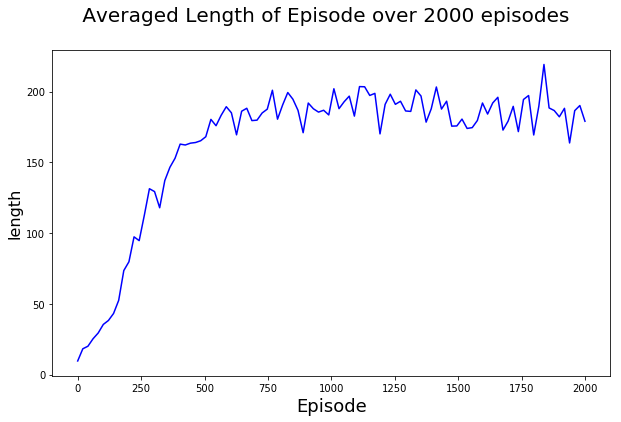

In [22]:
t = np.linspace(0,n_episodes-1,n_episodes/freq)
fig = plt.figure()
print(freq)
plt.plot(t,saved_data[:,0],'b')# plotting t,a separately 

fig.suptitle(' Averaged Length of Episode over 2000 episodes', fontsize=20)
legend = plt.legend(loc='lower right', shadow=True)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('length', fontsize=16)
plt.show()
fig.savefig('./results/pics/A4_lengths.jpg')

20.0


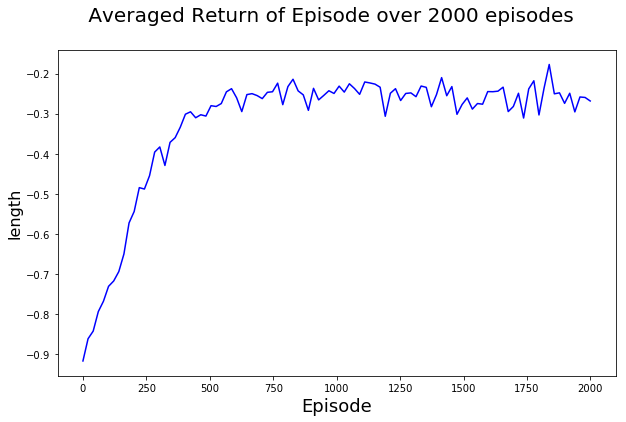

In [23]:
t = np.linspace(0,n_episodes-1,n_episodes/freq)
fig = plt.figure()
print(freq)
plt.plot(t,saved_data[:,1],'b')# plotting t,a separately 

fig.suptitle(' Averaged Return of Episode over 2000 episodes', fontsize=20)
legend = plt.legend(loc='lower right', shadow=True)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('length', fontsize=16)
plt.show()
fig.savefig('./results/pics/A4_returns.jpg')

# Load Model
Load the model of the best learning rate. Output the Average return and episode length

In [30]:
#alpha = 0.001
save_MDir = 'new_models/A4/'

file_name = "A4_large%i.ckpt" %(int(alpha*100000))
save_model = os.path.join(save_MDir,file_name)

#save_model = os.path.join(save_MDir,file_name)
init = tf.global_variables_initializer()
print(save_model)

new_models/A4/A4_large100.ckpt


In [34]:
def test_epoch(sess, test_episodes):   
    e_length = []
    e_return = []
    av_len = []
    av_ret = []
    for _ in range(test_episodes):
        s = env.reset()
        
        for t in range(300):
            this_q = sess.run(q, feed_dict={state: s.reshape(4, 1)})
            #ac_greedily
            a = np.argmax(this_q)

            s_prime, rwd, done, info = env.step(a)

            if done:
                e_length.append(t+1)
                e_return.append(-1 * discount**t)
                break
            s = s_prime

    #av_len.append(np.mean(np.array(episode_length)))
    #av_ret.append(np.mean(np.array(episode_return)))
    return e_length, e_return

In [36]:
tf.reset_default_graph()
env = gym.make('CartPole-v0')
env._max_episode_steps = 300
state = tf.placeholder("float", [4, 1])
action = tf.placeholder("int32", ())
next_state = tf.placeholder("float", [4, 1])
reward = tf.placeholder("float", ())

q,optimize = get_q_optimize2(state, next_state,action, alpha, reward, discount)

init  = tf.global_variables_initializer()
test_episodes = 50
"""---------------- restore model after training  --------------------------"""
# restore model and calculate mean length and return over n_test episodes
with tf.Session() as sess:
    saver = tf.train.Saver()
    sess.run(init)
    print(save_model)
    saver.restore(sess = sess, save_path= save_model)
    print("Restored values for learning rate: ",alpha)
    restored_length, restored_return = test_epoch(sess,50)
    print('The average length of episode is: {} with std: {} '.format(np.mean(restored_length),np.std(restored_length)))
    print('The average return of episode is: {} with std: {} '.format(np.mean(restored_return),np.std(restored_return)))


[2017-04-08 17:20:30,710] Making new env: CartPole-v0


new_models/A4/A4_large100.ckpt
Restored values for learning rate:  0.001
The average length of episode is: 185.4 with std: 13.807244475274565 
The average return of episode is: -0.15820674902897067 with std: 0.021367709619433094 
